In [3]:
import h5py
import numpy as np
import hashlib

import matplotlib
from matplotlib import pyplot as plt
import analysis.utils.binning as bins
import WatChMaL.analysis.utils.fitqun as fq


def regression_analysis(true_positions, pred_positions):
    '''
    - scatter plot of pred vs true
    - residual histogram
    '''
    vertex_axis = ['X', 'Y', 'Z']
    for i in range(3): 
        line = np.linspace(-1600,1600,10)
        plt.figure(figsize=(5,5))
        color = plt.rcParams["axes.prop_cycle"].by_key()["color"][i]
        plt.scatter(true_positions[:,i], pred_positions[:,i], alpha=0.05, s=0.1, color=color)
        plt.plot(line, line, '--', color='black', alpha=0.5)
        plt.xlim(-2000,2000)
        plt.ylim(-2000,2000)
        
        plt.title(f'Event Vertex for {vertex_axis[i]} Axis')
        plt.xlabel('True Position [cm]')
        plt.ylabel('Predicted Position [cm]')
        plt.show()

        residuals = true_positions[:,i] - pred_positions[:,i]
        residuals_div = residuals/(true_positions[:,i])
        residuals_cut = [] 
        residuals_div_cut = []
        cut = 1600
        
        for r in range(len(residuals)):
            if -cut < residuals[r] <  cut:
                residuals_cut.append(residuals[r])
            if -cut < residuals_div[r] < cut:
                residuals_div_cut.append(residuals_div[r])

        plt.hist(residuals_cut, bins=50, alpha=0.7, color=color)
        plt.xlim(-cut, cut)

        plt.title(f'Event Vertex for {vertex_axis[i]} Axis')
        plt.xlabel('true - predicted [cm]')
        plt.ylabel('count')
        plt.show()

        plt.hist(residuals_div_cut, bins=50, alpha=0.7, color=color)
        plt.xlim(-cut, cut)
        

        plt.title(f'Event Vertex for {vertex_axis[i]} Axis')
        plt.xlabel('(true - predicted)/true')
        plt.ylabel('count')
        plt.show()

def un_normalize(data, x_bounds=(-1600,1600), y_bounds=(-1600,1600), z_bounds=(-1600,1600)):
    '''
    '''
    bounds = [x_bounds, y_bounds, z_bounds]
    for i in range(3):
        data[i] = ((data[i])*(bounds[i][1] - bounds[i][0])) + bounds[i][0] 
        
    return data

def plot_regression_results(file_path = '/fast_scratch_2/aferreira/t2k/ml/data/oct20_combine_flatE/fitqun_combine.hy'):
    '''
    looking at 
    e_1rpos[3]  	        	Electron hypothesis vertex position (3D, x=0, y=1, z=2)
    mu_1rpos[3] 	                Muon hypothesis vertex position (3D, x=0, y=1, z=2)
    '''
    (discr, labels, fitqun_1rmom, fitqun_hash), (mu_1rpos, e_1rpos) = fq.read_fitqun_file(file_path, regression=True)

    print(mu_1rpos)
    print(e_1rpos)

    print(len(mu_1rpos))
    print(len(e_1rpos))
    #hy = h5py.File(inputPath, "r") # NEED TO JUST LOOK AT TEST
    #rootfiles = np.array(hy['root_files'])[idx].squeeze()
    #event_ids = np.array(hy['event_ids'])[idx].squeeze()
    #ml_hash = fq.get_rootfile_eventid_hash(rootfiles, event_ids, fitqun=False)

    dirpath = '/fast_scratch_2/aferreira/t2k/ml/data/oct20_combine_flatE/nov26_normed_regression_only/20092023-101855/'
    true_positions = np.load(dirpath + "true_positions.npy") # how to confirm this is test?
    tp = []
    for t in true_positions:
        tp.append(un_normalize(t))
    true_positions = np.array(tp)
    print(true_positions.shape)

    # in future read in same generic plotting stuff
    regression_analysis(true_positions, e_1rpos)
    regression_analysis(true_positions, mu_1rpos)

<KeysViewHDF5 ['e_1rdir', 'e_1rmom', 'e_1rnll', 'e_1rpos', 'event_ids', 'labels', 'mu_1rdir', 'mu_1rmom', 'mu_1rnll', 'mu_1rpos', 'pi_1rdir', 'pi_1rmom', 'pi_1rnll', 'pi_1rpos', 'root_files']>
[  0   1   2 ... 197 198 199]
[  0   1   2 ... 197 198 199]
fitqun e- avg: 0.9799709117915552
fitqun mu- avg: 0.9286346396965866
(240002, 1, 3) (240002, 1, 3)
(231085, 3)


ValueError: x and y must be the same size

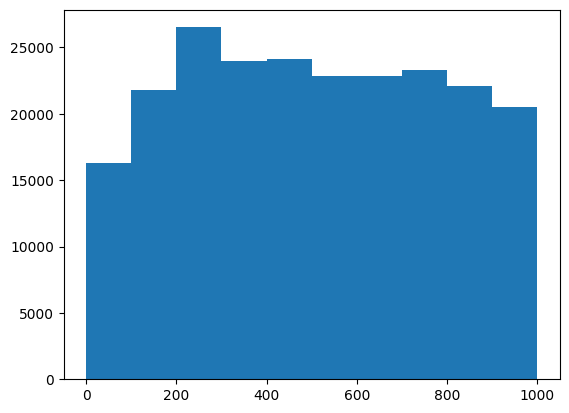

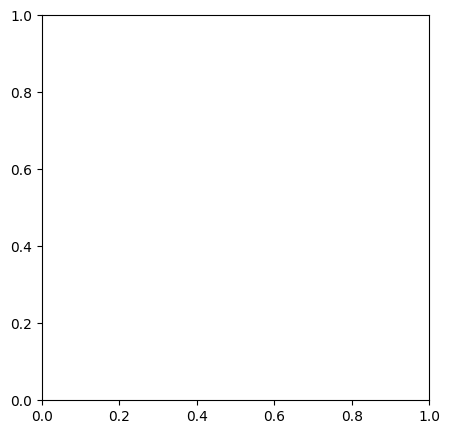

In [4]:
plot_regression_results() # --> true is not split up into classes, not sure how to do this and map correctly 
# ideas:
# 1) split true into classes 
# --> still need to figure out mapping (use hash)